# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.210799e+01     6.607787e+00
 * time: 0.004467010498046875
     1     3.011811e+01     5.921048e+00
 * time: 0.013432025909423828
     2     2.432883e+01     1.135036e+01
 * time: 0.034715890884399414
     3     1.657288e+01     4.355590e+00
 * time: 0.059686899185180664
     4     1.400945e+01     4.851408e+00
 * time: 0.07924509048461914
     5     1.177648e+01     3.440784e+00
 * time: 0.09504890441894531
     6     1.115683e+01     1.579627e+00
 * time: 0.11066389083862305
     7     9.814676e+00     1.230571e+00
 * time: 0.12611889839172363
     8     9.310326e+00     9.169093e-01
 * time: 0.14188098907470703
     9     9.119847e+00     1.029906e+00
 * time: 0.1576828956604004
    10     9.091079e+00     1.154650e+00
 * time: 0.17006492614746094
    11     9.044250e+00     6.946551e-01
 * time: 0.18288707733154297
    12     8.949293e+00     7.601334e-01
 * time: 0.1955420970916748
    13     8.835368e+00     7.671422e-01
 * tim

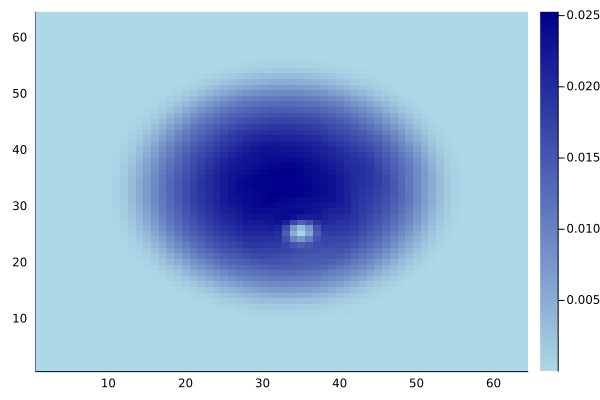

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)